# Exercise 8
The aim of this exercise is to simulate an Hamiltonian with potential
$$ V(x)=x^4 - 2.5 x^2 $$
using simulated annealing the test function is given by
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
and the parameters to find are are $\mu,\sigma$.

Starting from some random values for $\mu,\sigma$ say 1 and .5, The following averages are obtained

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams.update({'font.size': 18})

x = np.linspace(0,99,100)
df = pd.read_csv("modulus.txt")
H = pd.read_csv("H.txt")
res = pd.read_csv("valori.txt")
H_final = pd.read_csv("H_final.txt")
points = pd.read_csv("points.txt")
points2 = pd.read_csv("points2.txt")

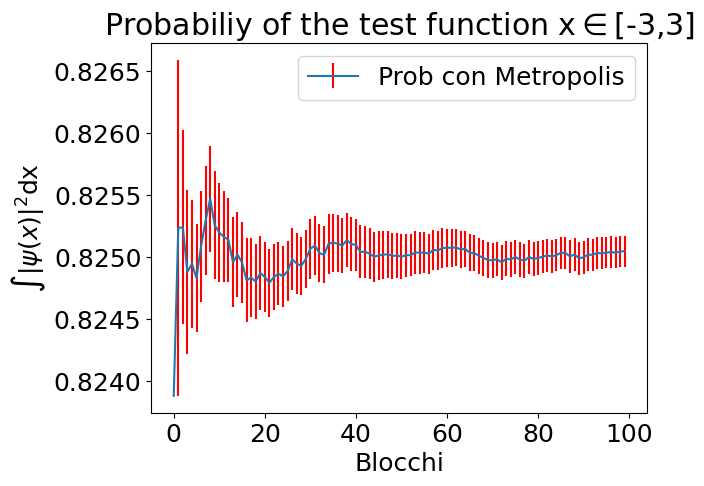

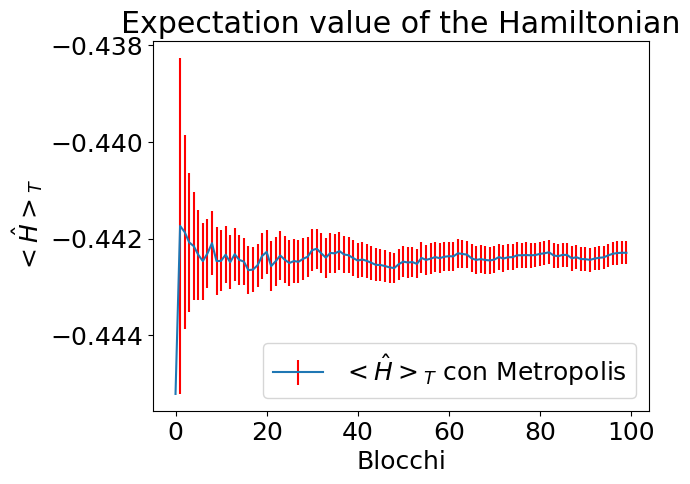

In [2]:
plt.title("Probabiliy of the test function x$\in$[-3,3]")
plt.errorbar(x,df["I"],yerr=df["err"],ecolor='r', label="Prob con Metropolis")
plt.xlabel("Blocchi")
plt.ylabel("$\int|\psi(x)|^2$dx")
plt.legend()
plt.show()

plt.title("Expectation value of the Hamiltonian")
plt.errorbar(x,H["H"],yerr=H["err"],ecolor='r', label="$<\hat{H}>_T$ con Metropolis")
plt.xlabel("Blocchi")
plt.ylabel("$<\hat{H}>_T$")
plt.legend(loc= "lower right")
plt.show()

After getting an idea of the behaviour of averages, I checked the sampled position and compared with the analytic function

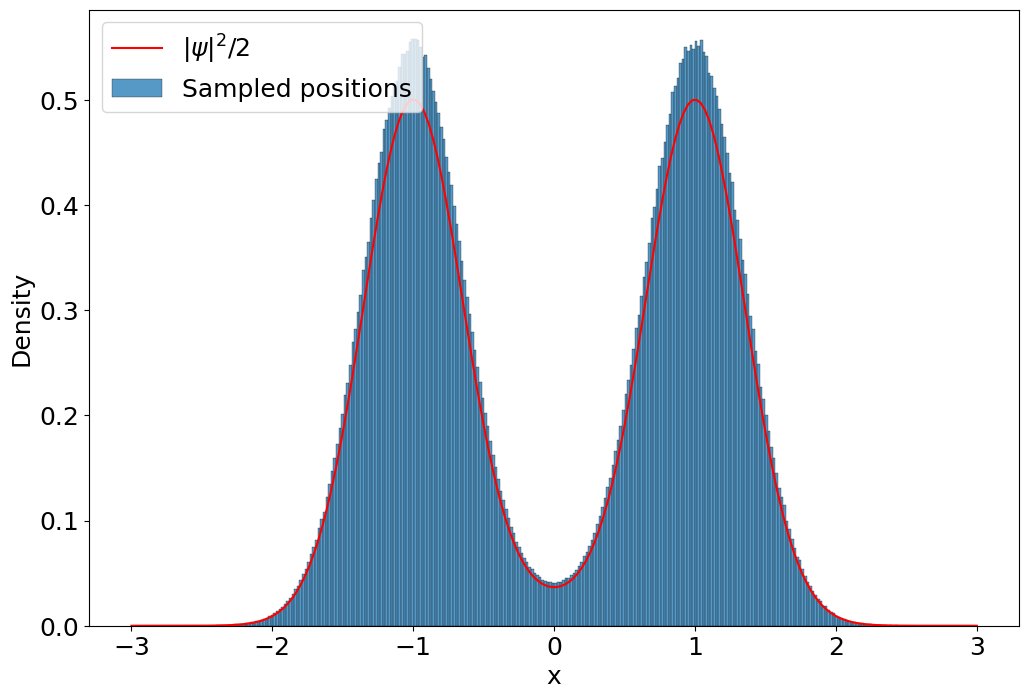

In [3]:
x = np.linspace(-3,3,200)      # uso l'ordinamento da 1 a N

mu = 1.0
sgm = 0.5

def f(x):
    return np.e**((-(x-mu)**2)/(2*sgm**2)) + np.e**((-(x+mu)**2)/(2*sgm**2))

plt.figure(figsize=(12,8))
sns.histplot(points,x="x",stat = "density",label ="Sampled positions")
plt.plot(x,0.5*f(x)**2,color='r',label = "$|\psi|^2/2$")
plt.legend()

# Simulated annealing

Now the simulated annealing gives the values that minimize the Hamiltonian. After getting the minimal value an estimation expectation value  with these values is done.

# Estimation with parameters that minimize $<H>_T$

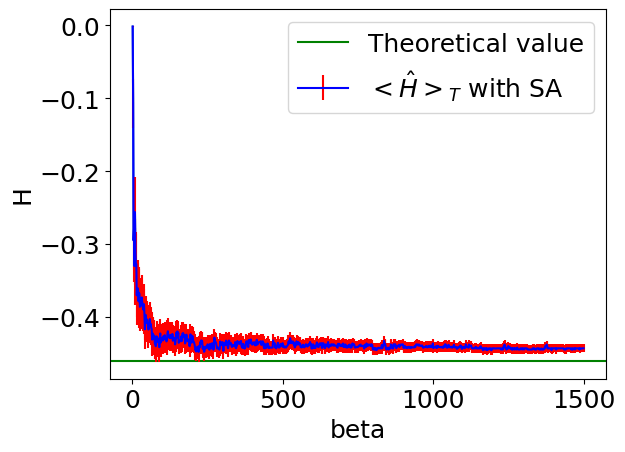

In [4]:
plt.axhline(-0.46046587969271513,color='g',label="Theoretical value")
sns.lineplot(data=res,y="H",x="beta")
plt.errorbar(res["beta"],res["H"],yerr=res["err_H"],color="blue",ecolor='r', label="$<\hat{H}>_T$ with SA")
plt.legend()

It can be seen that the value stays above the theoretical results for $E_0$ as expected, the values of $\mu,\sigma$ that minimize the expectation value are:

In [5]:
minima = res[res["H"]==res["H"].min()]
minima

,beta,mu,err_mu,sigma,err_sigma,H,err_H
146,220.0,0.774712,0.023797,0.648819,0.021687,-0.44782,0.013393


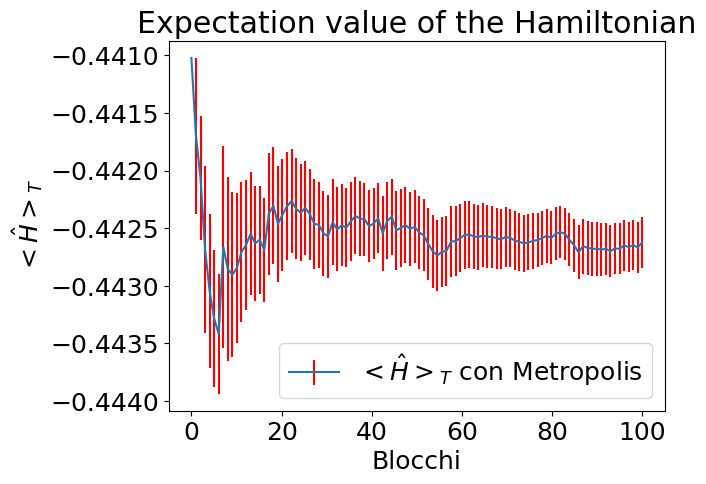

In [6]:
x = np.linspace(0,len(H_final),len(H_final))


plt.title("Expectation value of the Hamiltonian")
plt.errorbar(x,H_final["H"],yerr=H_final["err"],ecolor='r', label="$<\hat{H}>_T$ con Metropolis")
plt.xlabel("Blocchi")
plt.ylabel("$<\hat{H}>_T$")
plt.legend(loc= "lower right")
plt.show()

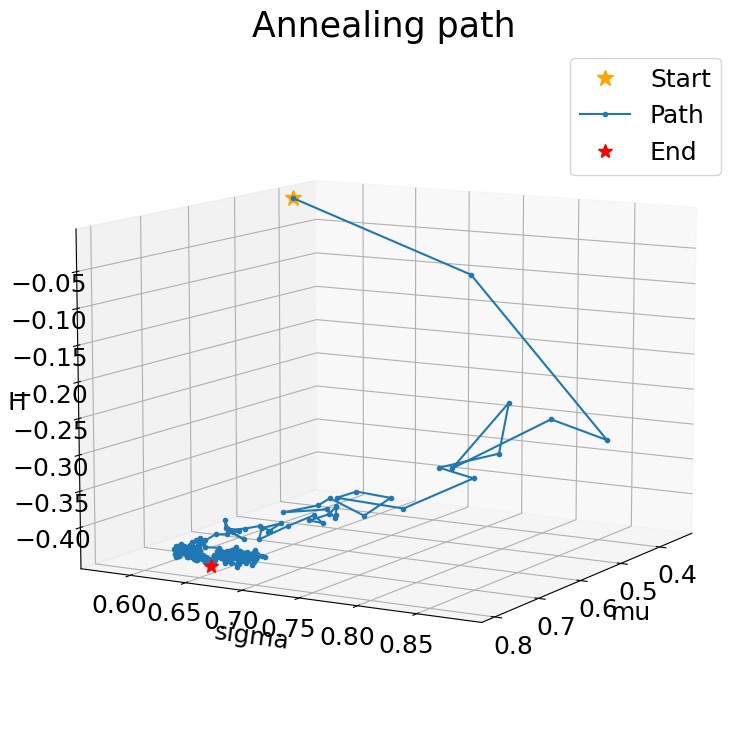

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(res["mu"][0], res["sigma"][0], res["H"][0], marker='*', markersize = 12, color = "orange", label = "Start", linestyle = "")
ax.plot(res["mu"], res["sigma"], res["H"], marker='.', linestyle = "-", label = "Path")
ax.plot(minima["mu"], minima["sigma"], minima["H"], marker='*', markersize = 10, color = "r", label = "End", linestyle = "")
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('H')
plt.title("Annealing path", fontsize = 25)
ax.legend()

ax.view_init(10, 30)
plt.show()

# Sampled positions

Ground state energy:  -0.4604658796927155
1st excited state energy:  0.09742471331760941
2nd excited state energy:  1.971733134393021


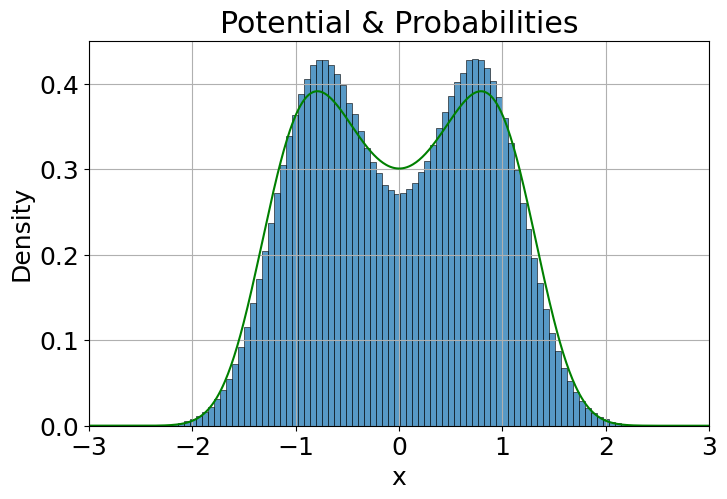

In [8]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
sns.histplot(points2,x="x",stat = "density",label ="Sampled positions",bins=100)
plt.plot(x,(psi[0])**2,color ="g")
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.show()

The graphs show the comparison between the sampled position and the theoretical value of the density function, the curve fits the histogram fairly well.